In [7]:
from function_memoire import *

# PARTIE NCE-GAN 1D

# I ) NCE for a 1D distribution

Data $X \sim  N(m,s)$

Noise $Y \sim  Q = \mu +\sigma N(0,1)$ with $\mu, \sigma$ fixed (in the code it is fixed at mu_unit and sigma_init)

## Lets experiment NCE with different values of $\mu_{data}, \sigma_{data} , \mu_{noise}, \sigma_{noise}$ 

### Cas 1 : Loi du bruit très distincte de l'échantillon: 
* ( mu_data = 12, sigma _data= 1 ////VS//// mu_noise=24 , sigma_noise = 5)

In [2]:
mupo = 12
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

est_const=[]
nb_it=[]

for i in range(10):
    grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 5, learning_rate = [1,0.01], max_iters = 500, nu =1)    
    est_const.append(grad.cte)
    nb_it.append(len(grad.ctes))
    
quad_error = np.mean((np.array(est_const) - 1/(sqrt(2*pi)*sigmapo))**2 )
var_estim = np.var(np.array(est_const))
mean_it = np.mean(np.array(nb_it))


In [3]:
tab=[['quadratic error', quad_error],['Variance estim', var_estim],['coefficient de variation',var_estim/(1/(sqrt(2*pi)*sigmapo))],['Number of Iterations Average',mean_it],["true constant value" ,1/(sqrt(2*pi)*sigmapo)],['mean of the estimator', np.mean(est_const)],['biais', np.mean(np.array(est_const)-1/(sqrt(2*pi)*sigmapo))]]

print(tabulate(tab))

----------------------------  -------------
quadratic error                  0.0148613
Variance estim                   0.00373321
coefficient de variation         0.00935777
Number of Iterations Average  5001
true constant value              0.398942
mean of the estimator            0.504432
biais                            0.10549
----------------------------  -------------


#### Impact de nu =(Taille echantillon du bruit)/(Taille echantillon data)

In [4]:
mupo = 12
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 
x= np.linspace(1,100,num=50)

ctes1=[]
V1=[]
C1 = []

for i in x:
    
    for j in range(10):
        
        grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 0.2, learning_rate = [1,0.01], max_iters = 100, nu = i)
        #print(grad.m0)
        ctes1.append(grad.cte)
    
    C1.append(np.mean((np.array(ctes1)-1/(sqrt(2*pi)*sigmapo))**2))
    V1.append(np.var(ctes1))
    ctes1 = []
    
#print(ctes)




In [5]:
mupo = 12
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

H1 = []

for i in x:
    grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=4, cte_init = 0.2, learning_rate = [1,0.01], max_iters = 500, nu =i)
    H1.append(grad.cte)


(array([ 1., 47.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-359.26027803,  -91.59669929,  176.06687944,  443.73045818,
         711.39403691,  979.05761565, 1246.72119438, 1514.38477312,
        1782.04835185, 2049.71193059, 2317.37550932]),
 <a list of 10 Patch objects>)

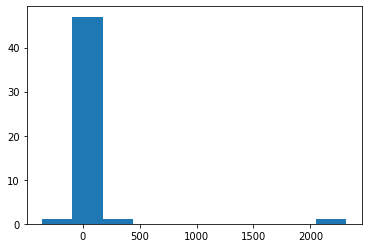

In [6]:
plt.hist(H1)

[Text(0, 0.5, 'Quadratic Error'), Text(0.5, 0, 'nu')]

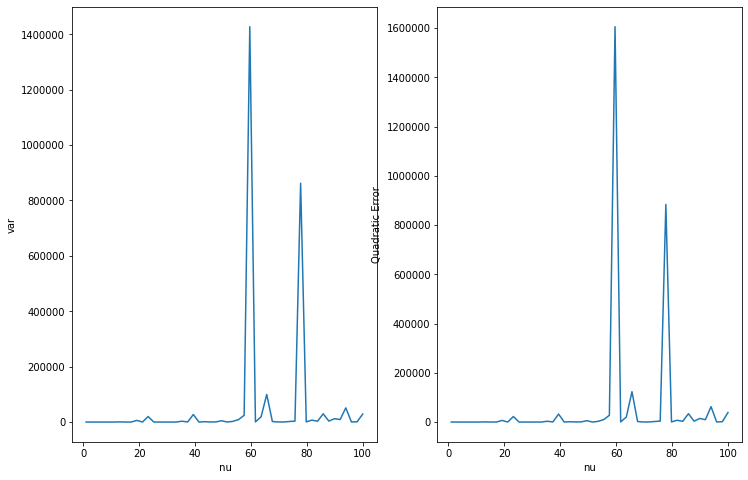

In [7]:
#

#fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig= plt.figure(figsize=(12,8))
ax1= plt.subplot(1,2,1)
ax1.plot(x,V1)
ax1.set(xlabel=" nu",ylabel="var")

ax2=plt.subplot(1,2,2)
ax2.plot(x,C1)
ax2.set(xlabel='nu',ylabel='Quadratic Error')



### Cas 2: Loi du bruit"raisonnablement" distincte de celle de l'échantillon

In [8]:
### NCE 

mupo = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

est_const2=[]
nb_it2=[]

for i in range(10):
    grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 7, sigma_init=4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu =1)    
    est_const2.append(grad.cte)
    nb_it2.append(len(grad.ctes))
    
quad_error2 = np.mean((np.array(est_const2) - 1/(sqrt(2*pi)*sigmapo))**2 )
var_estim2 = np.var(np.array(est_const2))
mean_it2 = np.mean(np.array(nb_it2))




In [9]:
tab=[['quadratic error', quad_error2],['Variance estim', var_estim2],['coefficient de variation',var_estim2/(1/(sqrt(2*pi)*sigmapo))],['Number of Iterations Average',mean_it2],["true constant value" ,1/(sqrt(2*pi)*sigmapo)],['mean of the estimator', np.mean(est_const2)],['biais', np.mean(np.array(est_const2)-1/(sqrt(2*pi)*sigmapo))]]
print(tabulate(tab))

----------------------------  --------------
quadratic error                  1.99883e-05
Variance estim                   8.57171e-06
coefficient de variation         0.000150403
Number of Iterations Average  5001
true constant value              0.0569918
mean of the estimator            0.0603706
biais                            0.00337884
----------------------------  --------------


In [10]:
#### Calcul variance NCE

mupo = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


x= np.linspace(1,100,num=50)

ctes2=[]
C2=[]
V2=[]

for i in x:
    
    for j in range(10):
        
        grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 7, sigma_init=4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 200, nu =i)
        #print(grad.m0)
        ctes2.append(grad.cte)
    
    C2.append(np.mean((np.array(ctes2)-1/(sqrt(2*pi)*sigmapo))**2))
    V2.append(np.var(ctes2))
    ctes2 = []
    
#print(ctes)




(array([ 1.,  1.,  5.,  8.,  7., 14.,  7.,  2.,  3.,  2.]),
 array([0.05279664, 0.05387948, 0.05496231, 0.05604515, 0.05712798,
        0.05821082, 0.05929366, 0.06037649, 0.06145933, 0.06254216,
        0.063625  ]),
 <a list of 10 Patch objects>)

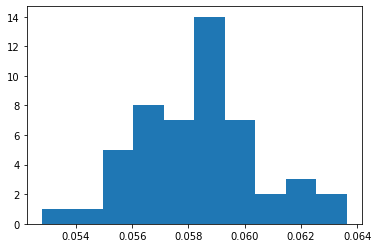

In [11]:
## Calcul histogramme NCE 

mupo = 5
sigmapo = 7
batch_size= 100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size))

H2 = []

for i in range (50):
    grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 7, sigma_init= 4, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu = 1)
    H2.append(grad.cte)
    
plt.hist(H2)


[Text(0, 0.5, 'Quadratic Error'), Text(0.5, 0, 'nu')]

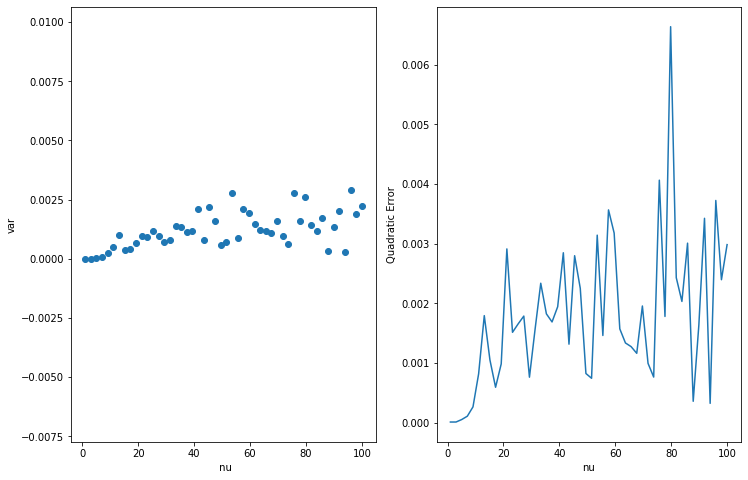

In [12]:
fig= plt.figure(figsize=(12,8))

ax1= plt.subplot(1,2,1)
ax1.scatter(x,V2)
ax1.set(xlabel=" nu",ylabel="var")

ax2=plt.subplot(1,2,2)
ax2.plot(x,C2)
ax2.set(xlabel='nu',ylabel='Quadratic Error')




### CAS 3: Bruit Très similaire à l'échantillon
* (m_data=4,sigma_data=7 /////VS////// m_noise=5,sigma_noise=7)

In [13]:
##NCE 

mupo = 4 #we take  mu_noise = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

est_const3=[]
nb_it3=[]

for i in range(10):
    grad=NCEDescent1D(x_batches, mupo, sigmapo,mu_init = 5, sigma_init=7, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu =1)    
    est_const3.append(grad.cte)
    nb_it3.append(len(grad.ctes))
    
quad_error3 = np.mean((np.array(est_const3) - 1/(sqrt(2*pi)*sigmapo))**2 )
var_estim3 = np.var(np.array(est_const3))
mean_it3 = np.mean(np.array(nb_it3))

In [14]:
tab=[['quadratic error', quad_error3],['Variance estim', var_estim3],['coefficient de variation',var_estim3/(1/(sqrt(2*pi)*sigmapo))],['Number of Iterations Average',mean_it3],["true constant value" ,1/(sqrt(2*pi)*sigmapo)],['mean of the estimator', np.mean(est_const3)],['biais', np.mean(np.array(est_const3)-1/(sqrt(2*pi)*sigmapo))]]
print(tabulate(tab))

----------------------------  --------------
quadratic error                  1.79838e-07
Variance estim                   1.67052e-07
coefficient de variation         2.93117e-06
Number of Iterations Average  4713
true constant value              0.0569918
mean of the estimator            0.0568787
biais                           -0.000113075
----------------------------  --------------


In [15]:
##NCE Variance en fonction de nu
mupo = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 


x= np.linspace(1,100,num=50)

ctes3=[]
C3=[]
V3=[]

for i in x:
    
    for j in range(10):
        
        grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init= 7, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 200, nu =i )
        #print(grad.m0)
        ctes3.append(grad.cte)
    
    C3.append(np.mean((np.array(ctes3)-1/(sqrt(2*pi)*sigmapo))**2))
    V3.append(np.var(ctes3))
    ctes3 = []
    
#print(ctes)


(array([2., 2., 5., 6., 8., 8., 6., 7., 3., 3.]),
 array([1.45908351, 1.46548718, 1.47189085, 1.47829452, 1.48469819,
        1.49110186, 1.49750553, 1.5039092 , 1.51031287, 1.51671654,
        1.52312021]),
 <a list of 10 Patch objects>)

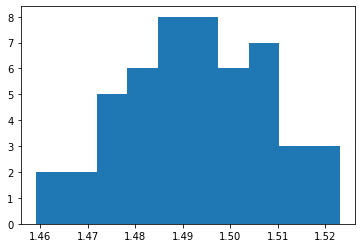

In [16]:
#### Préparation Histogramme de la constante pour nu=1, m_data= 0.5, s_data = 1, m_noise=5, s_noise=7

mupo = 0.5
sigmapo = 1
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size))

H3 = []

for i in range (50):
    grad = NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init= 7, cte_init = 5, learning_rate = [0.01,0.01], max_iters = 500, nu = 1)
    H3.append(grad.cte)
plt.hist(H3)

[Text(0, 0.5, 'Quadratic Erro'), Text(0.5, 0, 'nu')]

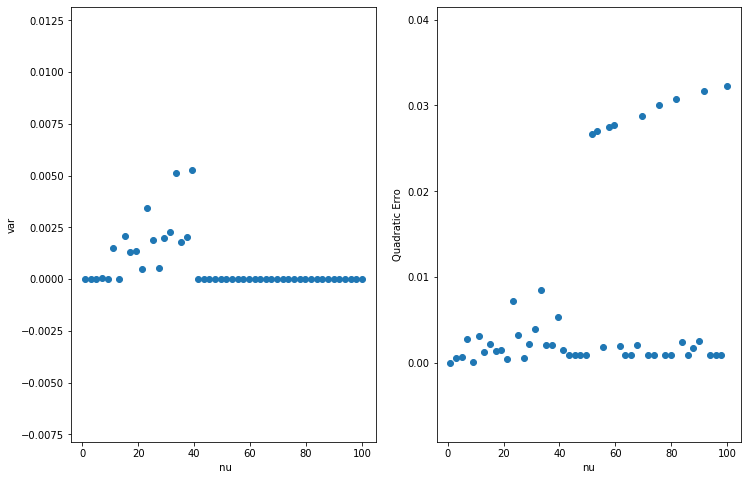

In [17]:
## plot:
fig= plt.figure(figsize=(12,8))

ax1= plt.subplot(1,2,1)
ax1.scatter(x,V3)
ax1.set(xlabel=" nu",ylabel="var")

ax2=plt.subplot(1,2,2)
ax2.scatter(x,C3)
ax2.set(xlabel='nu',ylabel='Quadratic Erro')



# Variation de notre estimateur pour toutes les valeurs de $\mu$ et de $\sigma$  

In [9]:
#graph de l'evolution de l'erreur quadratique en fonction de la moyenne du noise
mupo = 0.5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

np.random.seed(5)

L_mu = np.linspace(0, 10, 10)
L_sigma = np.linspace(1, 10, 10)
estim_c = []
error_quad = [] #erreur quadratique de la constante
L = np.ones(shape=(10,10))
KL_0 = []

for k in L_mu:
    for i in L_sigma:
        for j in range(10):
            grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = k, sigma_init=i, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 300)
            estim_c.append(grad.cte)
        x = np.mean((np.array(estim_c) - 1/(sqrt(2*pi)*sigmapo))**2)
        error_quad.append(x)
        pm = norm.pdf(x, mupo, sigmapo)
        KL_0.append(kl_divergence(pm, pn(x, k, i)))
        L[np.argwhere(L_mu==k)[0][0], np.argwhere(L_sigma==i)[0][0]] = x

### Variation de l'erreur quadratique en fonction de la distance de Kullback-Lieber

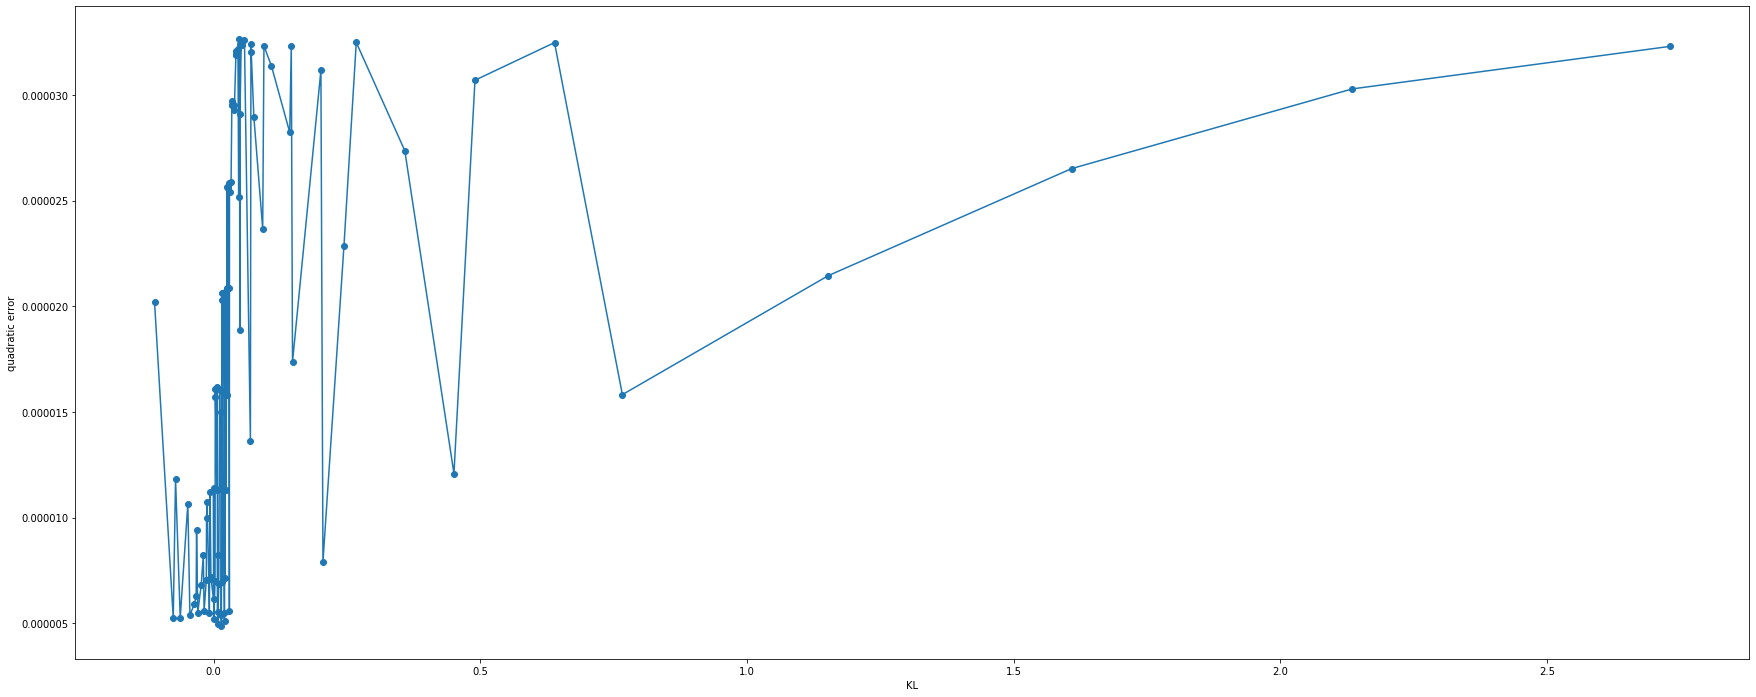

In [10]:
KL_and_error = KL_0 + error_quad
KL_0_ord, error_ord = zip(*sorted(zip(KL_0, error_quad)))

plt.figure(figsize=(30,12))
plt.plot(KL_0_ord, error_ord)
plt.xlabel('KL')
plt.ylabel('quadratic error')
plt.scatter(KL_0_ord, error_ord)
plt.show()

### Comparaison de deux lois normales à l'aide de la distance de Kullback-Lieber

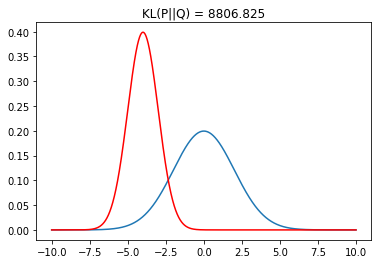

In [11]:
x = np.arange(-10, 10, 0.001)
p = pn(x, 0, 2)
q = norm.pdf(x, -4, 1)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

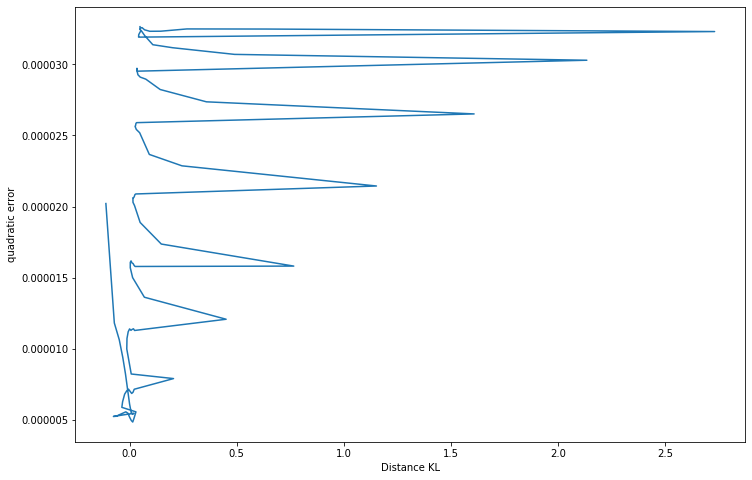

In [19]:
pm = norm.pdf(x, 0.5, 7)

plt.figure(figsize=(12,8))
plt.plot(KL_0, error_quad)
plt.xlabel('Distance KL')
plt.ylabel('quadratic error')
plt.show()

In [18]:
def f(k, i): #fonction pour dessiner en 3D 
    return L[np.argwhere(L_mu==k)[0][0], np.argwhere(L_sigma==i)[0][0]]

### Vision 3D du comportement de l'erreur en fonction de l'espérance ('mu') et de la variance ('sigma') 

Text(0.5, 0, 'ERROR')

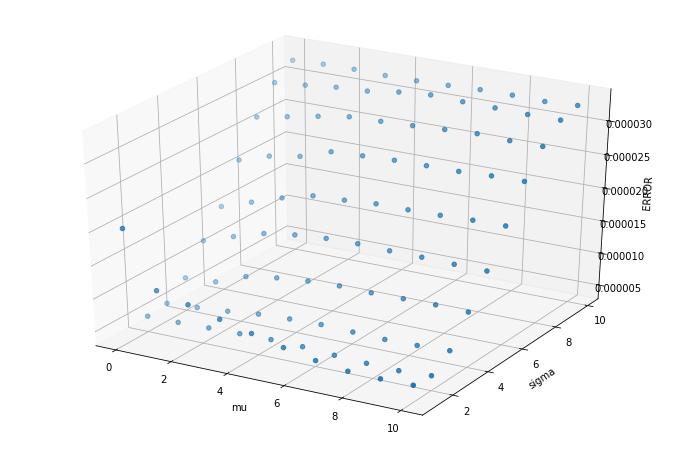

In [17]:
from mpl_toolkits import mplot3d
%matplotlib inline 

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

xline = L_mu
yline = L_sigma
zline = [[f(x, y) for y in yline] for x in xline]

xline, yline = np.meshgrid(xline, yline)

ax.scatter3D(xline, yline, zline, 'gray')
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('ERROR')

## GAN for estimation of a 1D density

Generator is given by $G(z) = \mu + \sigma*z$ with$z ~ N(0,1)$



### Lets experiment GAN with different values of  $𝜇_{𝑑𝑎𝑡𝑎},𝜎_{𝑑𝑎𝑡𝑎},𝜇_{𝑛𝑜𝑖𝑠𝑒},𝜎_{𝑛𝑜𝑖𝑠𝑒}$

In [18]:
mupo = 24
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

print("#########  With good learning rate for gen parameters ########")

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)

print("\n #########  With bad learning rate for gen parameters #######")

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)



#########  With good learning rate for gen parameters ########
constant estimate 0.05729923018534209
true constant value 0.05699175434306182
mu generaor  22.8120410529168
sigma generaor  7.355956263475365

 #########  With bad learning rate for gen parameters #######
constant estimate 0.053766519182194265
true constant value 0.05699175434306182
mu generaor  5.970357283689325
sigma generaor  2.768694261298494


In [19]:
mupo = 24
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

### Problemes numeriques !!!!

grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=1, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 800)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)


constant estimate 0.2
true constant value 1.9947114020071635
mu generaor  5.0
sigma generaor  1.0


In [20]:
mupo = 0.5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=GANDescent(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=1, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 800)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))
print("mu generaor ",grad.mu)
print("sigma generaor ",grad.sigma)


constant estimate 1.9948274915415878
true constant value 1.9947114020071635
mu generaor  0.505027118813583
sigma generaor  0.27445259401878397


### Plots and  Numerical Experiments, Comparisons GAN vs NCE:

In [21]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=50
MU = np.linspace(-10 , 10, num=l)

nces = np.ones(l)

for i in range(l):
    grad=GANDescent(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    
    nces[i]= grad.cte
    


1.9947114020071635


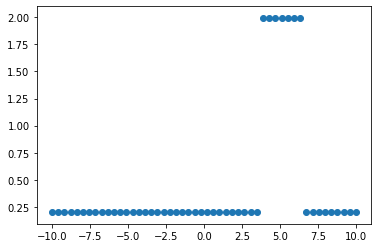

In [22]:
plt.scatter(MU, nces)
print(1/(np.sqrt(2*pi)*0.2))

In [23]:
mupo = 5
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 

l=200
MU = np.linspace(-10 , 10, num=l)
nces1 = np.ones(l)

for i in range(l):
    grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = MU[i], sigma_init= sigmapo, cte_init = 0.2, learning_rate = [0.01,0.1], max_iters = 500)    

    nces1[i]= grad.cte
    


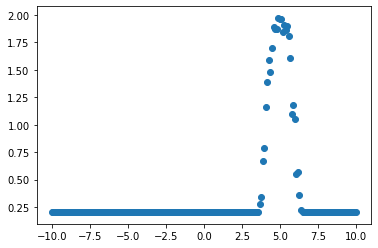

In [24]:
plt.scatter(MU, nces1)
#plt.hist( nces1)

### Tests supplementaires NCE

In [25]:
mupo = 24
sigmapo = 0.2
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 24, sigma_init=0.2, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 1.9936533306651987
true constant value 1.9947114020071635


In [26]:
mupo = 0.5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 0.5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 0.05699145801535641
true constant value 0.05699175434306182


In [27]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=7, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 0.05619420394593846
true constant value 0.05699175434306182


In [28]:
mupo = 0.5 #we take  mu_noise = 5
sigmapo = 7 #we take sigma_noise  = 5
batch_size=100
X = random.normal(mupo, sigmapo, 1000)
x_batches = np.reshape(X, (10, batch_size)) 



grad=NCEDescent1D(x_batches,mupo, sigmapo,mu_init = 5, sigma_init=5, cte_init = 0.2, learning_rate = [0.01,0.01], max_iters = 500)    
print("constant estimate",grad.cte)
print("true constant value" , 1/(sqrt(2*pi)*sigmapo))

constant estimate 0.06743404038951022
true constant value 0.05699175434306182
